In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [62]:
os.getcwd()

'D:\\ML Project-Freelancing'

In [5]:
os.chdir("D:\ML Project-Freelancing")

In [6]:
Autism = pd.read_excel("Autism_Data.xlsx")
Autism

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


In [7]:
Autism.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [8]:
Autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [9]:
Autism.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [10]:
Autism=Autism.drop(columns=["age_desc","result"])
Autism

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25,f,White-European,no,no,Russia,no,Self,YES
700,1,0,0,0,0,0,0,1,0,1,34,m,Hispanic,no,no,Mexico,no,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,24,f,?,no,no,Russia,no,?,YES
702,1,0,0,1,1,0,1,0,1,1,35,m,South Asian,no,no,Pakistan,no,Self,NO


In [11]:
Autism = Autism.rename(columns={'austim':'Family_mem_with_ASD','jundice':'Jaundice','contry_of_res':'country_of_res'})


In [12]:
Autism['ethnicity'] = Autism['ethnicity'].apply(lambda x: 'Others' if x == '?' else x)
Autism['ethnicity'] = Autism['ethnicity'].apply(lambda x: 'Others' if x == 'others' else x)
Autism['ethnicity'] = Autism['ethnicity'].apply(lambda x: 'Hispanic' if x == 'Latino' else x)

In [13]:
Autism['age'] = Autism['age'].apply(lambda x: np.nan if x == '?' else int(x))


In [14]:
Autism['relation'] = Autism['relation'].apply(lambda x: 'Others' if x == '?' else x)


In [15]:
Autism.isna().sum()

A1_Score               0
A2_Score               0
A3_Score               0
A4_Score               0
A5_Score               0
A6_Score               0
A7_Score               0
A8_Score               0
A9_Score               0
A10_Score              0
age                    2
gender                 0
ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
country_of_res         0
used_app_before        0
relation               0
Class/ASD              0
dtype: int64

In [16]:
Autism=Autism.dropna()
Autism.isna().sum()

A1_Score               0
A2_Score               0
A3_Score               0
A4_Score               0
A5_Score               0
A6_Score               0
A7_Score               0
A8_Score               0
A9_Score               0
A10_Score              0
age                    0
gender                 0
ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
country_of_res         0
used_app_before        0
relation               0
Class/ASD              0
dtype: int64

In [17]:
Autism_cat=Autism[["gender","ethnicity","Jaundice","Family_mem_with_ASD",
                "country_of_res","used_app_before","relation","Class/ASD"]]
Autism_cat

,gender,ethnicity,Jaundice,Family_mem_with_ASD,country_of_res,used_app_before,relation,Class/ASD
0,f,White-European,no,no,United States,no,Self,NO
1,m,Hispanic,no,yes,Brazil,no,Self,NO
2,m,Hispanic,yes,yes,Spain,no,Parent,YES
3,f,White-European,no,yes,United States,no,Self,NO
4,f,Others,no,no,Egypt,no,Others,NO
...,...,...,...,...,...,...,...,...
699,f,White-European,no,no,Russia,no,Self,YES
700,m,Hispanic,no,no,Mexico,no,Parent,NO
701,f,Others,no,no,Russia,no,Others,YES
702,m,South Asian,no,no,Pakistan,no,Self,NO


In [18]:
Autism.drop(["gender","ethnicity","Jaundice","Family_mem_with_ASD",
                "country_of_res","used_app_before","relation","Class/ASD"],axis=1,inplace=True)


In [19]:
Autism.describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, .25, .5, .75, .9, .95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
A1_Score,702.0,0.723647,0.447512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0
A2_Score,702.0,0.452991,0.498140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0
A3_Score,702.0,0.458689,0.498646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0
A4_Score,702.0,0.497151,0.500348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0
A5_Score,702.0,0.498575,0.500354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0
A6_Score,702.0,0.284900,0.451689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0
A7_Score,702.0,0.417379,0.493478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0
A8_Score,702.0,0.650997,0.476995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0
A9_Score,702.0,0.324786,0.468629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0
A10_Score,702.0,0.574074,0.494835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0


In [20]:
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x
Autism_new_afteroutlier=Autism.apply(outlier_capping)

In [21]:
Autism_new_afteroutlier.describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, .25, .5, .75, .9, .95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
A1_Score,702.0,0.723647,0.447512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0000,1.00
A2_Score,702.0,0.452991,0.498140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0000,1.00
A3_Score,702.0,0.458689,0.498646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0000,1.00
A4_Score,702.0,0.497151,0.500348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0000,1.00
A5_Score,702.0,0.498575,0.500354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0000,1.00
A6_Score,702.0,0.284900,0.451689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0000,1.00
A7_Score,702.0,0.417379,0.493478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0000,1.00
A8_Score,702.0,0.650997,0.476995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0000,1.00
A9_Score,702.0,0.324786,0.468629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0000,1.00
A10_Score,702.0,0.574074,0.494835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0000,1.00


In [22]:
Autism1=Autism_new_afteroutlier
Autism1

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age
0,1,1,1,1,0,0,1,1,0,0,26.0
1,1,1,0,1,0,0,0,1,0,1,24.0
2,1,1,0,1,1,0,1,1,1,1,27.0
3,1,1,0,1,0,0,1,1,0,1,35.0
4,1,0,0,0,0,0,0,1,0,0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0
700,1,0,0,0,0,0,0,1,0,1,34.0
701,1,0,1,1,1,0,1,1,0,1,24.0
702,1,0,0,1,1,0,1,0,1,1,35.0


# Label Encoding

In [23]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
Autism_cat= Autism_cat.apply(le.fit_transform)
Autism_cat

,gender,ethnicity,Jaundice,Family_mem_with_ASD,country_of_res,used_app_before,relation,Class/ASD
0,0,8,0,0,64,0,4,0
1,1,2,0,1,13,0,4,0
2,1,2,1,1,56,0,2,1
3,0,8,0,1,64,0,4,0
4,0,4,0,0,22,0,1,0
...,...,...,...,...,...,...,...,...
699,0,8,0,0,51,0,4,1
700,1,2,0,0,40,0,2,0
701,0,4,0,0,51,0,1,1
702,1,6,0,0,47,0,4,0


In [24]:
Autism_new=pd.concat([Autism1,Autism_cat],axis=1)


In [25]:
Autism_new

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,Jaundice,Family_mem_with_ASD,country_of_res,used_app_before,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,8,0,0,64,0,4,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,2,0,1,13,0,4,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,2,1,1,56,0,2,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,8,0,1,64,0,4,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,4,0,0,22,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,0,8,0,0,51,0,4,1
700,1,0,0,0,0,0,0,1,0,1,34.0,1,2,0,0,40,0,2,0
701,1,0,1,1,1,0,1,1,0,1,24.0,0,4,0,0,51,0,1,1
702,1,0,0,1,1,0,1,0,1,1,35.0,1,6,0,0,47,0,4,0


In [26]:
Autism_new.corr()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,Jaundice,Family_mem_with_ASD,country_of_res,used_app_before,relation,Class/ASD
A1_Score,1.000000,0.012033,0.070229,0.123898,0.170253,0.107769,0.219444,0.142301,0.142904,0.118341,0.008359,-0.075594,0.110005,-0.020668,0.096239,0.024355,-0.041378,0.092681,0.296099
A2_Score,0.012033,1.000000,0.224762,0.159718,0.151401,0.186408,-0.044838,0.035919,0.206045,0.066231,0.077381,-0.044654,0.174518,0.112884,0.074783,0.143890,-0.009623,0.049037,0.312159
A3_Score,0.070229,0.224762,1.000000,0.411198,0.265631,0.267671,0.078866,0.014268,0.313894,0.168516,0.091789,0.000685,0.174858,0.060981,0.112848,0.054165,0.055043,0.120905,0.440248
A4_Score,0.123898,0.159718,0.411198,1.000000,0.307682,0.293951,0.152150,0.004794,0.326397,0.211155,0.100661,-0.056789,0.211174,0.064086,0.193043,0.046997,0.022731,0.099985,0.469136
A5_Score,0.170253,0.151401,0.265631,0.307682,1.000000,0.393140,0.236398,0.102513,0.397423,0.265461,0.005355,-0.036949,0.072388,0.034435,0.090159,-0.018210,0.000376,0.151857,0.538055
A6_Score,0.107769,0.186408,0.267671,0.293951,0.393140,1.000000,0.176153,0.097996,0.478777,0.294771,0.088663,-0.083858,0.185020,0.077831,0.113444,-0.010943,0.087193,0.060700,0.591647
A7_Score,0.219444,-0.044838,0.078866,0.152150,0.236398,0.176153,1.000000,0.086408,0.190224,0.250011,-0.004651,0.064994,0.025370,0.031059,-0.008441,-0.016094,-0.022476,0.070927,0.352430
A8_Score,0.142301,0.035919,0.014268,0.004794,0.102513,0.097996,0.086408,1.000000,0.099381,0.100618,-0.069579,0.064223,-0.013835,0.010854,0.033447,-0.044530,-0.041776,0.097980,0.235557
A9_Score,0.142904,0.206045,0.313894,0.326397,0.397423,0.478777,0.190224,0.099381,1.000000,0.283660,0.122821,0.006870,0.134922,0.057114,0.167034,-0.073923,0.049342,0.049027,0.635147
A10_Score,0.118341,0.066231,0.168516,0.211155,0.265461,0.294771,0.250011,0.100618,0.283660,1.000000,0.042489,-0.052542,0.124378,0.052146,0.118006,0.026983,-0.041980,0.125749,0.386435


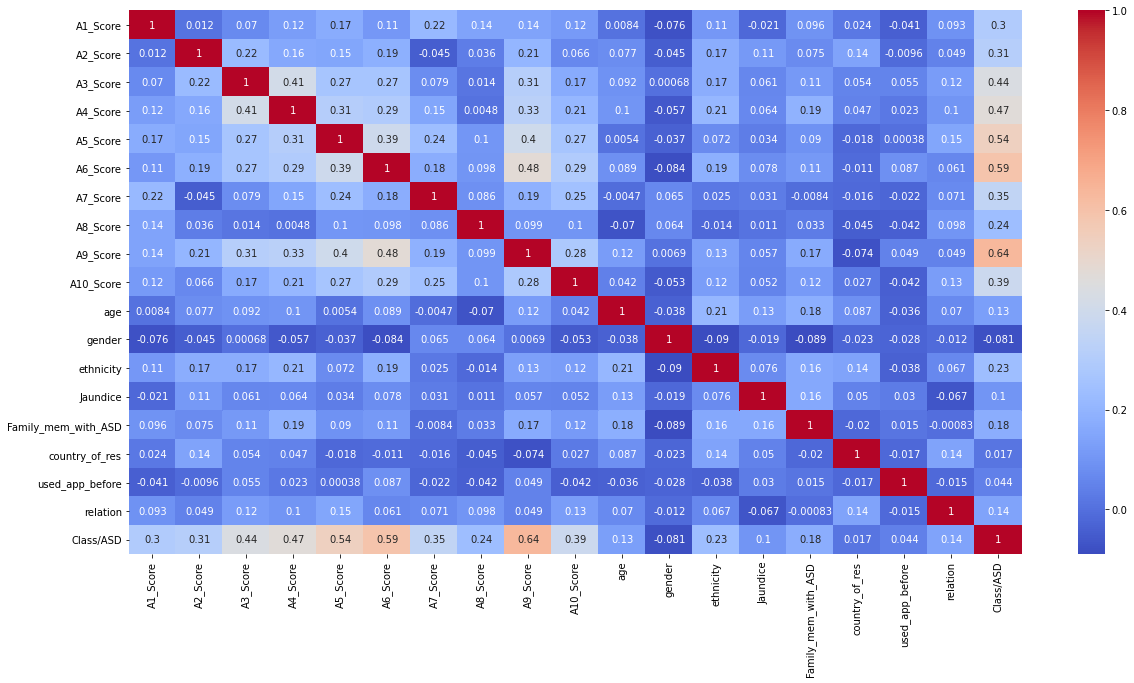

In [27]:
d=Autism_new.corr()
plt.figure(figsize=(20,10))
sns.heatmap(d, cmap="coolwarm", annot=True)
plt.show() 

In [28]:
x = Autism_new.drop(columns=["Class/ASD"])
y = Autism_new['Class/ASD']


In [29]:
x = Autism1.drop(columns=["A9_Score"])


In [30]:
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
#variation inflation faactor
vif=pd.DataFrame()
vif["vif_value"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"]=x.columns
vif.sort_values(by="vif_value",ascending=False)

,vif_value,features
9,4.518176,age
0,3.602976,A1_Score
8,2.727887,A10_Score
7,2.687083,A8_Score
4,2.638351,A5_Score
3,2.626955,A4_Score
2,2.373072,A3_Score
6,1.975740,A7_Score
1,1.964673,A2_Score
5,1.826446,A6_Score


# Standardization

In [31]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(x)

In [32]:
x = pd.DataFrame(scaled_df, columns=x.columns)

In [33]:
x

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A10_Score,age
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.219619
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.170815
2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.244021
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.439239
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.561249
...,...,...,...,...,...,...,...,...,...,...
697,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.195217
698,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.414837
699,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.170815
700,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.439239


# Splitting Data into Train and Test


In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (526, 10)
Shape of x_test:  (176, 10)
Shape of y_train:  (526,)
Shape of y_test:  (176,)


# Logistic Regression


In [35]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)


LogisticRegression()

In [36]:
print("Train accuracy:", log.score(x_train,y_train))

print("Test accuracy:", log.score(x_test,y_test))


Train accuracy: 0.967680608365019
Test accuracy: 0.9602272727272727


In [37]:
l_pred_train = log.predict(x_train)
l_pred_train


array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [38]:
metrics.confusion_matrix(y_train, l_pred_train)

array([[383,   4],
       [ 13, 126]], dtype=int64)

In [39]:
print(metrics.classification_report(y_train, l_pred_train)) 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       387
           1       0.97      0.91      0.94       139

    accuracy                           0.97       526
   macro avg       0.97      0.95      0.96       526
weighted avg       0.97      0.97      0.97       526



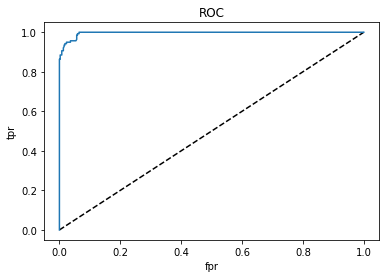

In [40]:
probs=log.predict_proba(x_train)[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_train,probs)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logisticsregression')
plt.title("ROC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

# Random Forest


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = RandomForestClassifier(max_depth=8 ,random_state=88)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, random_state=88)

In [43]:
print("Train accuracy:", clf.score(x_train,y_train))

print("Test accuracy:", clf.score(x_test,y_test))


Train accuracy: 0.9961977186311787
Test accuracy: 0.9488636363636364


In [44]:
features = clf.feature_importances_

In [45]:
features= pd.DataFrame(features)
features

,0
0,0.067887
1,0.057099
2,0.072664
3,0.111272
4,0.165471
5,0.228654
6,0.062243
7,0.068141
8,0.074384
9,0.092184


# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=11,  p=4)
knn1.fit(x_train, y_train)
print("Train Score :", knn1.score(x_train, y_train))
print("Test Score :", knn1.score(x_test, y_test)) 

Train Score : 0.9638783269961977
Test Score : 0.9488636363636364


In [47]:
k_pred_train = knn1.predict(x_train)
k_pred_train

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [48]:
metrics.confusion_matrix(y_train, k_pred_train)

array([[375,  12],
       [  7, 132]], dtype=int64)

In [49]:
print(metrics.classification_report(y_train, k_pred_train)) 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       387
           1       0.92      0.95      0.93       139

    accuracy                           0.96       526
   macro avg       0.95      0.96      0.95       526
weighted avg       0.96      0.96      0.96       526



# SVM

In [50]:
from sklearn import svm 
sv2=svm.SVC(kernel='rbf')
sv2.fit(x_train, y_train)
print("Train score :", sv2.score(x_train, y_train))
print("Test score :", sv2.score(x_test, y_test))

Train score : 0.9828897338403042
Test score : 0.9375


In [51]:
s_pred_train = sv2.predict(x_train)
s_pred_train

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [52]:
metrics.confusion_matrix(y_train, s_pred_train)

array([[386,   1],
       [  8, 131]], dtype=int64)

In [53]:
print(metrics.classification_report(y_train, s_pred_train)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       387
           1       0.99      0.94      0.97       139

    accuracy                           0.98       526
   macro avg       0.99      0.97      0.98       526
weighted avg       0.98      0.98      0.98       526



# Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)


GaussianNB()

In [55]:
print("Train Accuracy ",gn.score(x_train,y_train))
print("Test Accuracy ",gn.score(x_test,y_test))

Train Accuracy  0.9657794676806084
Test Accuracy  0.9431818181818182


In [56]:
n_pred_train = gn.predict(x_train)
n_pred_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [57]:
metrics.confusion_matrix(y_train, n_pred_train)

array([[381,   6],
       [ 12, 127]], dtype=int64)

In [58]:
print(metrics.classification_report(y_train, n_pred_train)) 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       387
           1       0.95      0.91      0.93       139

    accuracy                           0.97       526
   macro avg       0.96      0.95      0.96       526
weighted avg       0.97      0.97      0.97       526

